# Dataset and Library
The dataset that will be used as a sample in this notebook is the [Drug Review Dataset](https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com) from the open source UCI Machine Learning Repository and the python [wordcloud](https://pypi.org/project/wordcloud/) library

##Data preprocessing

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2023-01-31 10:04:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/x-httpd-php]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  15.0MB/s    in 2.7s    

2023-01-31 10:04:18 (15.0 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [ ]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [ ]:
%%capture
!pip install scattertext

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import spacy
import scattertext as st
import matplotlib.pyplot as plt
from IPython.display import IFrame
from IPython.core.display import display, HTML

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
df1 = pd.read_csv('drugsComTest_raw.tsv',delimiter='\t')   
df2 = pd.read_csv('drugsComTrain_raw.tsv', delimiter='\t')
medication_reviews_df = pd.concat([df1,df2])

In [ ]:
medication_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [ ]:
medication_reviews_df.rename(columns={"Unnamed: 0": "uniqueId"},inplace=True)

In [ ]:
medication_reviews_df

,uniqueId,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [ ]:
medication_reviews_df[:50]

,uniqueId,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4.0,"July 3, 2014",13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6.0,"June 6, 2016",1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9.0,"April 21, 2009",32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7.0,"October 18, 2016",21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2.0,"April 16, 2011",3


In [ ]:
medication_reviews_df['date'].min()

'April 1, 2008'

In [ ]:
medication_reviews_df['date'].max()

'September 9, 2017'

##Diseases and Medications text visualization using WordClouds

(-0.5, 399.5, 199.5, -0.5)

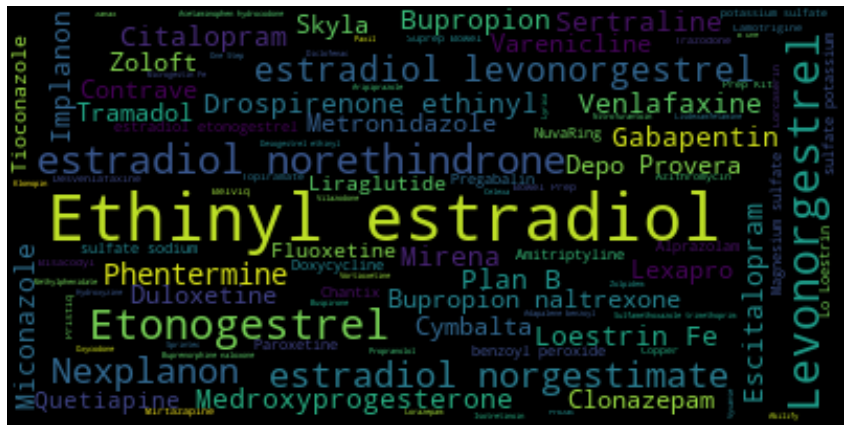

In [ ]:
all_drugs = medication_reviews_df['drugName'].to_string()
wordcloud = WordCloud().generate(all_drugs)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

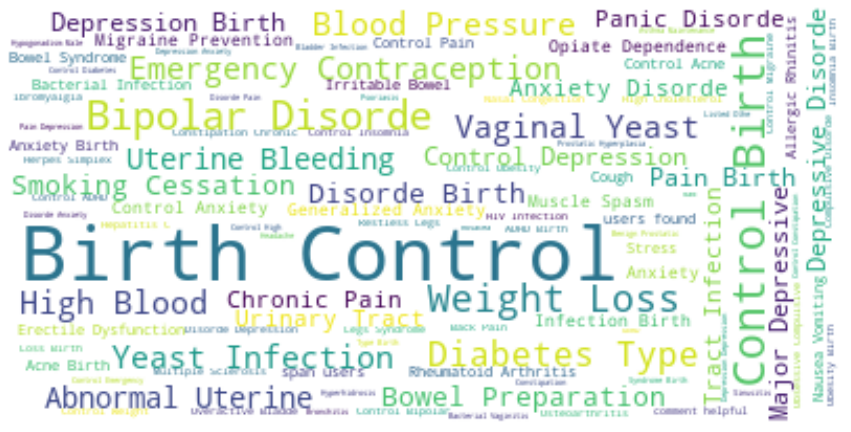

In [ ]:
all_conditions = medication_reviews_df['condition'].to_string()
wordcloud = WordCloud(background_color="white").generate(all_conditions)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")